Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


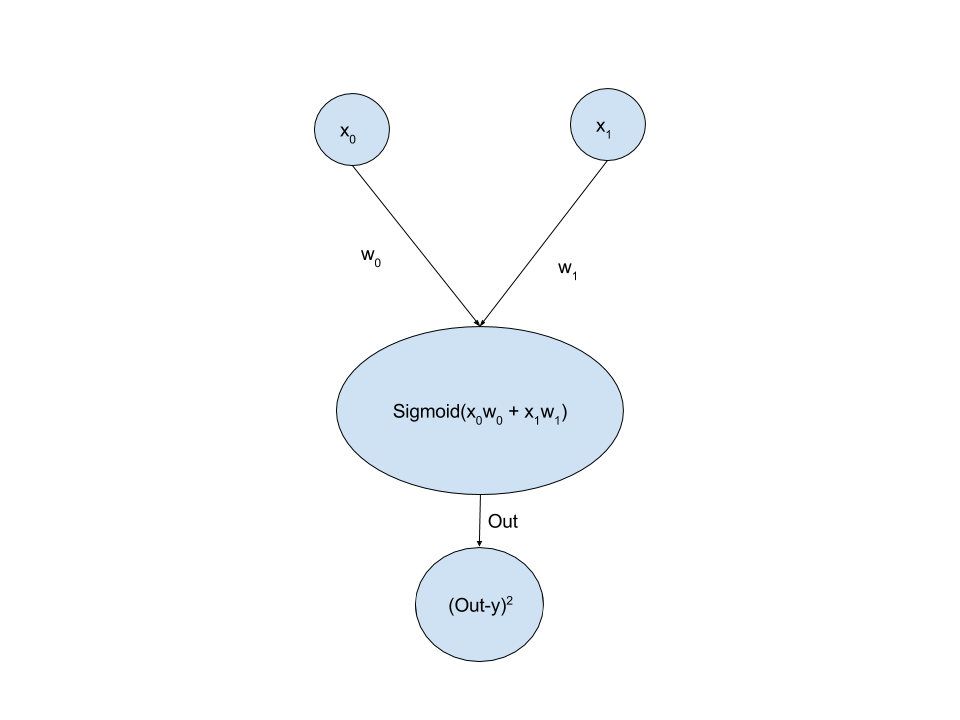

In [2]:
import numpy as np
from IPython import display
from IPython.display import Image
# import pylab as pl
import time
from mpl_toolkits.mplot3d import Axes3D


sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1-sigmoid(x))
F = 2

%pylab notebook
Image("./BackpropDemo.png")


In [3]:
#Simple Forward Prop
np.random.seed(0)

x = np.array([.5, -1])
w = np.array([0.25, 1])
y = 0
print('x: {}'.format(x))
print('w: {}'.format(w))
output_pre = x.T.dot(w)
print('output_pre: {}'.format(output_pre))
output = sigmoid(output_pre)
print('output: {}'.format(output))
loss = 0.5 * (output - y)**2
print('loss: {}'.format(loss))


x: [ 0.5 -1. ]
w: [ 0.25  1.  ]
output_pre: -0.875
output: 0.29421497216298875
loss: 0.04328122492243412


In [4]:
# Simple Backprop
dloss_dout = output - y
print('dloss_dout: {}'.format(dloss_dout))
dout_dpre = dsigmoid(output)
print('dout_dpre: {}'.format(dout_dpre))

dpre_dw = x
print('dpre_dw: {}'.format(dpre_dw))
# dpre_dx = w
dloss_dw = dloss_dout * dout_dpre * dpre_dw
print('dloss_dw: {}'.format(dloss_dw))

dloss_dout: 0.29421497216298875
dout_dpre: 0.24466695308560746
dpre_dw: [ 0.5 -1. ]
dloss_dw: [ 0.03599234 -0.07198468]


<IPython.core.display.Javascript object>


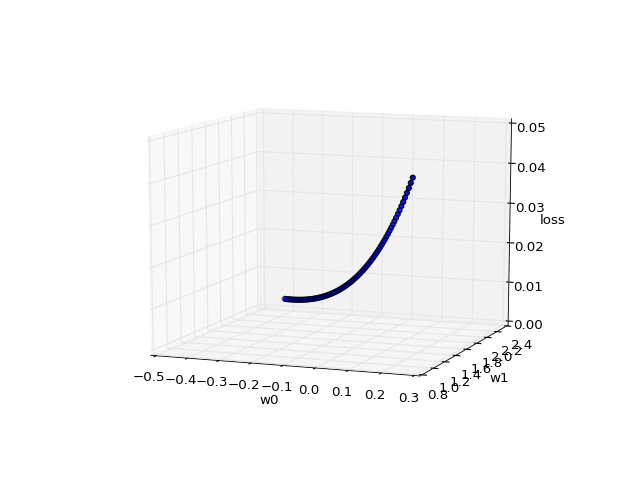

Iteration: 0
output_pre: -0.875
output: 0.29421497216298875
loss: 0.04328122492243412
dloss_dout: 0.29421497216298875
dout_dpre: 0.24466695308560746
dpre_dw: [ 0.5 -1. ]
dloss_dw: [ 0.03599234 -0.07198468]
Iteration: 1
output_pre: -0.8974952127472766
output: 0.2895655037769466
loss: 0.04192409048879844
dloss_dout: 0.2895655037769466
dout_dpre: 0.24483186273262056
dpre_dw: [ 0.5 -1. ]
dloss_dw: [ 0.03544743 -0.07089486]
Iteration: 2
output_pre: -0.9196498570200327
output: 0.28502924371619554
loss: 0.0406208348867132
dloss_dout: 0.28502924371619554
dout_dpre: 0.24499036482009257
dpre_dw: [ 0.5 -1. ]
dloss_dw: [ 0.03491471 -0.06982942]
Iteration: 3
output_pre: -0.9414715502707908
output: 0.28060319214588947
loss: 0.03936907572123148
dloss_dout: 0.28060319214588947
dout_dpre: 0.24514273265905712
dpre_dw: [ 0.5 -1. ]
dloss_dw: [ 0.03439392 -0.06878783]
Iteration: 4
output_pre: -0.9629677481818839
output: 0.27628439587799114
loss: 0.038166533702833266
dloss_dout: 0.27628439587799114
dout_dpr

In [5]:
#Backprop training on a single row
eta = 0.25
wp = w

w0 = []
w1 = []
losses = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(150):
    print('Iteration: {}'.format(i))
    output_pre = x.T.dot(wp)
    print('output_pre: {}'.format(output_pre))
    output = sigmoid(output_pre)
    print('output: {}'.format(output))
    loss = 0.5 * (output - y)**2
    print('loss: {}'.format(loss))
    dloss_dout = output - y
    print('dloss_dout: {}'.format(dloss_dout))
    dout_dpre = dsigmoid(output)
    print('dout_dpre: {}'.format(dout_dpre))

    dpre_dw = x
    print('dpre_dw: {}'.format(dpre_dw))
    # dpre_dx = w
    dloss_dw = dloss_dout * dout_dpre * dpre_dw
    print('dloss_dw: {}'.format(dloss_dw))
    w0.append(wp[0])
    w1.append(wp[1])
    losses.append(loss)
    
    wp = wp - eta * dloss_dw

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')

ax.scatter(w0, w1, losses)
    

<IPython.core.display.Javascript object>


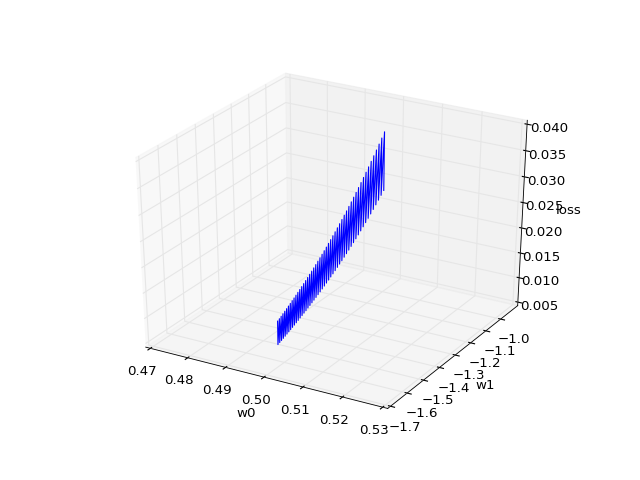

In [6]:
#Backprop training on 2 examples, one row at a time, ie SGD without the random
eta = 0.25
xall = np.array([[.5, -1], [0, 1]])
yall = np.array([1,0])
wp = wx = np.array([.5, -1])
num_epoch = 50

w0 = []
w1 = []
losses = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num_epoch):
    for j in range(2):
        xp = xall[j]
        yp = yall[j]
        output_pre = xp.T.dot(wp)
        output = sigmoid(output_pre)
        loss = 0.5 * (output - yp)**2
        dloss_dout = output - yp
        dout_dpre = dsigmoid(output)
    
        dpre_dw = xp
        dloss_dw = dloss_dout * dout_dpre * dpre_dw
        w0.append(wp[0])
        w1.append(wp[1])
        losses.append(loss)
    
    wp = wp - eta * dloss_dw
#     if len(w0) > 1:
#         ax.plot(w0, w1, losses)
#     pl.plot(losses)
#     display.clear_output(wait=True)
#     display.display(pl.gcf())
    time.sleep(0.05)
# ax.plot(w0, w1, losses, c=[.25, .75]*num_epoch)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')

ax.plot(w0, w1, losses)


<IPython.core.display.Javascript object>


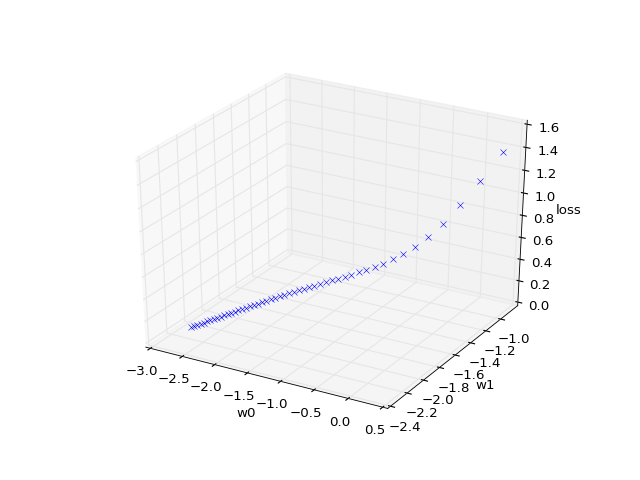

op: [ 0.48186896 -1.75152421  1.91105687  0.62640142 -0.46220793 -1.38225172
  0.25884385 -0.11174271  0.9521978   1.01062959]
output: [ 0.61818911  0.14785505  0.87113784  0.65167305  0.38646217  0.20064761
  0.56435206  0.47209335  0.72155696  0.73314334]
loss: 1.4552062779434478
dloss_dout: [ 0.61818911  0.14785505  0.87113784  0.65167305  0.38646217  0.20064761
  0.56435206  0.47209335  0.72155696 -0.26685666]
dout_dpre: [[ 0.22755799  0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.24863864  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.20798221  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.22522921  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.24089297  0.          0.
   0.          0.        

In [7]:
#Backprop training on 2 examples, both rows at a time, ie Basic Batch Gradient Descent
eta = 0.25
N=10
xall = np.random.randn(N, F)#np.array([[.5, -1], [0, 1]])
# xall = np.array([[.5, -1], [0.5, -1]])
yall = np.where(np.sum(xall,1) > 0, 0, 1) #np.array([1,0])
wp = wx = np.array([.5, -1])
num_epoch = 50

w0 = []
w1 = []
losses = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
for i in range(num_epoch):
    xp = xall
    yp = yall
    output_pre = xp.dot(wp)
    print('op: {}'.format(output_pre))
    output = sigmoid(output_pre)
    print('output: {}'.format(output))
    loss = 0.5 * np.sum((output - yp)**2)
    print('loss: {}'.format(loss))
    dloss_dout = output - yp
    print('dloss_dout: {}'.format(dloss_dout))
    dout_dpre = dsigmoid(output) * np.eye(N)
    print('dout_dpre: {}'.format(dout_dpre))
    
    dpre_dw = xp
    
    dloss_dw = dloss_dout.dot(dout_dpre).dot(dpre_dw)
    print('dloss_dw: {}'.format(dloss_dw))
    w0.append(wp[0])
    w1.append(wp[1])
    output_all = sigmoid(xall.dot(wp))
    total_loss = np.sum(0.5 * (output_all - yall)**2)
    losses.append(total_loss)
    
    wp = wp - eta * dloss_dw
# ax.plot(w0, w1, losses, c=[.25, .75]*num_epoch)
ax.plot(w0, w1, losses,'x')
